<a href="https://colab.research.google.com/github/V-Nayak/ML/blob/main/Anomaly_Tech(LOF_and_One_Class_SVM)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Local Outlier Factor:**
Local Outlier Factor is another anomaly detection technique that takes the density of data points into consideration to decide whether a point is an anomaly or not. The local outlier factor computes an anomaly score called anomaly score that measures how isolated the point is with respect to the surrounding neighborhood. It takes into account the local as well as the global density to compute the anomaly score.


In [ ]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import IsolationForest

from scipy import stats

In [ ]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 4.2 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/ML Projects/Superstore.xls")

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## **Sales Varibale Analysis**

In [ ]:
df.Sales.describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

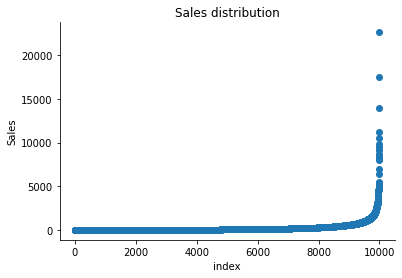

In [ ]:
plt.scatter(range(df.shape[0]), np.sort(df['Sales'].values))
plt.xlabel('index')
plt.ylabel('Sales')
plt.title("Sales distribution")
sns.despine()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


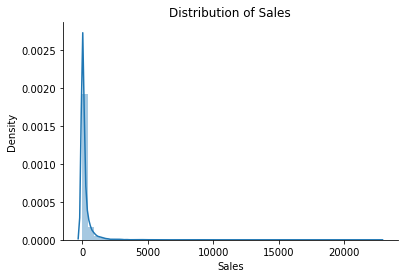

In [ ]:
sns.distplot(df['Sales'])
plt.title("Distribution of Sales")
sns.despine()

In [ ]:
print("Skewness: %f" % df['Sales'].skew())
print("Kurtosis: %f" % df['Sales'].kurt())

Skewness: 12.972752
Kurtosis: 305.311753


# **Profit Variable Analysis**

In [ ]:
df.Profit.describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

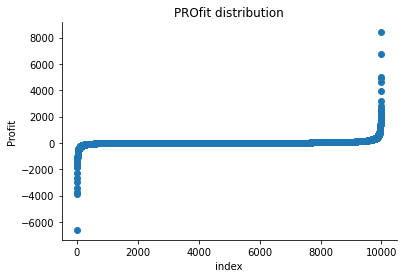

In [ ]:
plt.scatter(range(df.shape[0]), np.sort(df['Profit'].values))
plt.xlabel('index')
plt.ylabel('Profit')
plt.title("PROfit distribution")
sns.despine()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


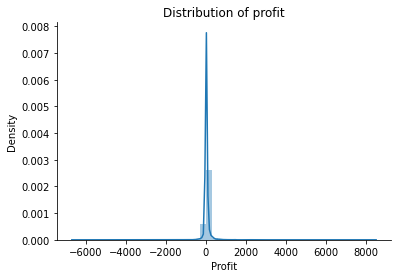

In [ ]:
sns.distplot(df['Profit'])
plt.title("Distribution of profit")
sns.despine()

In [ ]:
print("Skewness: %f" % df['Profit'].skew())
print("Kurtosis: %f" % df['Profit'].kurt())

Skewness: 7.561432
Kurtosis: 397.188515


# **Local Outlier Factor:**
Local Outlier Factor is another anomaly detection technique that takes the density of data points into consideration to decide whether a point is an anomaly or not. The local outlier factor computes an anomaly score called anomaly score that measures how isolated the point is with respect to the surrounding neighborhood. It takes into account the local as well as the global density to compute the anomaly score.




## **Advantages:**

Sometimes it might get tricky to determine outliers. A point that is at a small distance from a very dense cluster might be considered as an outlier but a point that is at a farther distance from a wider spread cluster might be considered an inlier. With LOR, outliers in local areas are determined, so this issue does not persist.
The method used in LOF can be applied in many other fields to solve problems of detecting outliers like geographic data, video streams, etc.
The LOF can be used to implement a different dissimilarity function as well. And it is found to outperform many other algorithms of anomaly detection.

## **Disadvantages:**

It is not always the same LOF score that determines whether a point is an outlier or not. It might vary for different data sets.
In higher dimensions, the LOF algorithm detection accuracy gets effected.
As LOF score can be any number that the ratio produces, it might be a little inconvenient to understand the distinguishing of inliers and outliers based on it.

In [ ]:
pip install scikit-learn


In [ ]:
pip install matplotlib

In [ ]:
def function lof = LOF(A, k)

#% Local Outlier Factor                                              
#% Authors: Markus M. Breunig, Hans-Peter Kriegel,                    
#%          Raymond T. Ng, J?rg Sander                               
#% Original paper :                                                  
#% LOF: Identifying Density-Based Local Outliers                     
#% e-mail : { breunig | kriegel | sander }                           
#%          @dbs.informatik.uni-muenchen.de                          
#%          rng@cs.ubc.ca                                            
#% Programmer: Yi-Ren Yeh(yirenyeh@gmail.com)                        
#% modified by: Zi-Wen Gui(evan176@hotmail.com)                      
#%                                                                   
#%                                                                   
#% Inputs                                                            
#%   A: the data matrix, each row represents an instance             
#%   k: the number of nearest neighbors, specified as an integer or  
#%      as a fraction of the total number of data points             
#%                                                                   
#% Outputs                                                           
#%   lof: the local outlier factor for each instance                 


if k < 1
    [numrows ~] = size(A);
    k = round(k*numrows);
end
 
try
    #Find the nearest neighbors by "KDTree" for each elements
    [k_index, k_dist] = knnsearch(A,A,'k',k+1,'nsmethod','kdtree','IncludeTies',true);

    #Ignore first element(itself) at nearest neighbors 
    k_index = cellfun(@(x) x(2:end),k_index,'UniformOutput',false);
    numneigh = cellfun('length',k_index);

    #Get k-distance
    k_dist1 = cell2mat(cellfun(@(x) x(end),k_dist,'UniformOutput',false));

    #Get row length of matrix A
    n = length(A(:,1));

    #Initialize lrd_value vector
    lrd_value = zeros(n,1);

    #Calculate lrd for each elements
    for i = 1:n
        lrd_value(i) = lrd(A, i, k_dist1, k_index, numneigh(i));
    end

    #Initialize lof vector
    lof = zeros(n,1);

    #Calculate LOF
    for i = 1:n
        lof(i) = sum(lrd_value(k_index{i})/lrd_value(i))/numneigh(i);
    end

    #Indices from sorting lof are the suspicious score rankings
    [~,suspicious_index]=sort(lof,'descend');
    
catch err
    if (strcmp(err.message, 'Invalid parameter name: IncludeTies.'))
        warning('MATLAB:LOF', 'Matlab not newest version? Falling back to old version.')
        [suspicious_index lof] = LOF_old(A, k);
    else
        rethrow(err)
    end
    
end

# ========================================================================
function lrd_value = lrd(A, index_p, k_dist,k_index, numneighbors)

# Calculate the reachability distance for nearest neighbors
Temp = repmat(A(index_p,:), numneighbors, 1) - A(k_index{index_p}, :);
Temp = sqrt(sum(Temp.^2,2));
reach_dist = max([Temp k_dist(k_index{index_p})],[],2);

#Calculate the local reachability density for each elements
lrd_value = numneighbors/sum(reach_dist);






-------------------------------------------------------------------------------------------
# Applying the above function on real data:
-----------------------------------------


# clc
# clear all
# close all
# warning off

x=[-3.172612497403688 , -5.7628264609523425
-4.139939534344915 , -10.296640641831749
-3.787190241835766 , -6.1728742192380395
-8.50953394497675 , -7.440087384537332
-3.4664504215713126 , -5.806779491243405
-8.218263344928168 , -7.106479401672028
-7.958663558554992 , -6.714094217371283
3.6191198221007026 , -1.449232318750055
-7.86666199553351 , -7.350105908740528
-7.676511160863395 , -7.678013750442524
0.40886940309653236 , -2.99881545010562
4.762636982785402 , -1.4174649208740395
-4.758954020989666 , -10.193612202500011
-2.428185337537956 , -6.3848358908385965
-3.585962246452888 , -7.222289543683262
-0.024786953741975926 , -2.158846718882592
4.196884235395435 , -2.3450708247618035
1.260808230270301 , -2.2452362077598043
-2.7551413530926134 , -6.635489852836212
4.7775180260422765 , -1.612867229200896
-2.0660289563156007 , -5.556097267413832
0.8301721505339296 , -3.201810683872481
-3.456229643016339 , -5.785169561852146
2.9455872103788785 , -1.8456299700593555
-4.183137370714161 , -6.038930225534192
-7.669992050084736 , -7.181916588183279
-4.214322557136342 , -9.623695197706281
-3.3008314488592534 , -5.864394975537411
-2.4804919789560214 , -7.214238662840126
-3.333136684951024 , -6.82427088188779
-8.214960435168168 , -6.560365248773077
-4.178011538669137 , -9.520696846998195
-8.524050213232993 , -6.194024627303177
-3.8089062920205654 , -9.660055845681686
0.7761096748121252 , -1.142728718573942
3.568592067550279 , -0.34821466202862283
1.5146696000399738 , -1.453519030525872
3.170405443144569 , -0.7822951437215351
1.5845979588694374 , -2.26208144499125
-2.702173259520851 , -6.550761470950994
-4.481695107269707 , -10.495815640842169
-8.132012046391191 , -6.553259746622567
0.6973293042949279 , -2.2256732978589473
-4.868756737100819 , -9.933978869231971
5.141194491726461 , -1.9278370448201185
-8.822150736043607 , -6.755633902587794
1.2922572631452862 , -1.8184910681484947
0.5818121483760123 , -1.6293202045393613
-3.995059284191586 , -6.3813750900367125
-7.533015983860344 , -6.784896223320434
-4.219251705783587 , -9.626589025181325
1.2118847915796316 , -1.4849179978395965
-3.0273330808805143 , -9.49610967199254
-7.079375294700283 , -6.579575567498329
-4.07538521674194 , -10.417951606605854
-2.8176178367463107 , -6.523703913219523
-7.941731486002445 , -8.23087622705875
4.43264798294371 , -1.865872111291165
-7.46005537297111 , -7.207647345109049
3.4370264560211847 , -1.6827772115081503
-8.410713471565101 , -7.054583347833286
-3.323875203023874 , -6.448194178252472
0.7647956996085565 , -1.8737579955793877
-3.400478506167498 , -9.940457451338347
-7.092452135637429 , -7.9208154359700575
4.863696577030376 , -1.5215030647298895
-4.323765785590621 , -10.06398071950349
-4.8360427028627795 , -8.7582425115218
-3.6380400800780683 , -7.4418239476138055
-2.790831259193557 , -11.673563503741025
0.5003766174063902 , -2.773312419049695
-3.7652199150851455 , -10.761247756800698
0.6603416957827366 , -1.8773073019788014
0.6668824362492803 , -2.620773678911776
-2.710668056728098 , -6.338002599951108
0.1123908396320078 , -1.6579659727147145
-6.919414790705069 , -7.233923945097106
-0.7136238367162666 , -7.257265528251588
-8.258503485821096 , -7.134473294941176
1.054455273106138 , -1.974640748149919
-3.45894517629296 , -10.238239418726458
-8.263733900016293 , -6.694090863305538
3.8082737722530036 , -1.9698165807006562
0.6165385494759068 , -2.234368646367508
5.158210761983134 , -2.112198670546511
-4.131765677027307 , -10.04841732009588
4.256867643556715 , -1.4681364483142605
-3.701179225174969 , -9.636320935475723
0.9663300171611315 , -2.694091162487771
4.9321912215128965 , -1.5635376642798213
0.1787281466140992 , -1.8259222604574905
-4.47402088108696 , -10.524081415004014
4.335057356178275 , -1.7414267522861393
2.2799228512583425 , -2.78216742158129
1.7964475680544545 , -2.7188535148594903
4.345442345325674 , -1.771501769092929
4.103810351075291 , -2.526028189206273
0.3545824383210377 , -1.3994804605927964
0.6764431071355633 , -2.370033882080318
0.5545972248646789 , -3.3513169434236714
-8.858817707488834 , -6.788183723671528
-3.4515472406376704 , -5.491072133365313
-2.8591563549044263 , -6.425800297025437
1.318734184469255 , -1.210481857777209
4.851716365189563 , -0.6636785996825972
-3.8877069295079476 , -9.062429179281185
-9.822748785215799 , -6.7558380154741196
-4.215853937060353 , -10.466859513265181
-2.5856046108020183 , -6.9330883885998
-7.5526992504158645 , -7.575755577576235
-8.473040300274205 , -7.62523097703364
0.7787351852523642 , -1.7459522393128661
0.10606826460367136 , -3.203937750978178
1.6751995902133592 , -1.891803615183511
0.3638422442310343 , -1.8030587976087553
1.557856001958847 , -2.8738683834649468
-8.994625591895927 , -8.236145356004878
0.860571941935549 , -1.6138481742903106
-8.694208798909644 , -6.405484384009431
-3.177879340974681 , -6.051321661539717
4.286035027485163 , -1.792956791514735
4.937574567405599 , -1.4882075107959643
4.301667972997661 , -1.3624331115617432
-7.600859033791071 , -8.188778770238919
-2.4839461992935865 , -6.072463209461508
-3.875887599536769 , -9.153188503508364
0.04833180456991615 , -3.6836675603862297
-7.7202013293564296 , -7.55836249700029
-3.09941644988513 , -6.939423273817313
-8.18961959968893 , -6.008732647788283
-8.624548502776186 , -5.782185343194049
-0.35251184023249693 , -1.699380320041736
-7.4838070229533535 , -6.339808386526561
1.382207081035674 , -2.0212993758930704
-8.224490807885898 , -6.598430660508421
4.023251624370628 , -1.884730876002588
-8.10739981652829 , -7.84880262736415
-3.527704048177245 , -6.529491446789139
0.21582557417836945 , -2.5791486102304644
-3.113442181874613 , -10.150220424217522
-8.101349460709473 , -7.3185963604922035
-4.4740097539373584 , -10.433070775133757
4.609296886787847 , -0.6829694540591758
-4.598567775718494 , -6.189811449847099
0.3537244811530636 , -2.635196066017063
-8.586663247872535 , -6.660244520765217
-6.886865072463619 , -7.086102938584966
-5.09116510109786 , -8.683292666271262
-3.7209131033592335 , -5.539702262882644
-2.4837273579263663 , -10.729559141840522
-9.409776794357732 , -6.878718810987478
-3.9047922867792373 , -10.667594514383948
-4.317547586283232 , -9.739996819639924
-4.693220988631061 , -10.069991246726206
-3.2260379618711723 , -6.29830272617228
5.084180213590313 , -1.5864671433536575
-2.780421702357784 , -10.335095762264555
-7.185211279886175 , -7.202141680979836
0.41619948184075 , -0.07200326168438265
3.746555108454743 , -0.9792982405472571
3.8450282082877205 , -1.7332940412597084
-4.4490070064715965 , -9.828107076304049
0.8337827427332197 , -1.4919531154579888
4.426058596859177 , -1.819291009550693
-3.974723055451153 , -5.668071534181637
-7.589726858106152 , -7.399379016729364
0.8057716954910006 , -2.5483574425586752
-2.7877503935319456 , -6.382563149237397
-3.0397247678556747 , -7.114083463646468
-2.97520954060385 , -6.430185484486902
4.825309089286493 , -2.031560412317397
-7.797744423769633 , -6.188346755379892
-8.267360719674961 , -6.971123873495689
-3.130047736986228 , -6.064125634540003
-8.65132942303767 , -8.35036222110416
-3.4124564123739782 , -10.385862516606046
0.9187342996708968 , -1.766289056199015
-3.832250440038802 , -9.852110839004025
0.489131266217742 , -1.6491059068629879
-7.814598391327457 , -5.964051607667926
0.339212186412318 , -2.148261598657154
-2.032536348993851 , -6.197769578353015
-8.401045690450664 , -6.552913450484366
-7.7243543461325554 , -8.11843756779745
-7.9591116924631855 , -7.330219751365642
-3.63984948211906 , -5.650742280554125
4.73681236642889 , -2.3975947873486967
4.517583719333528 , -0.9402091780076154
-9.42172645777414 , -8.568746575263376
-3.7817750400966634 , -5.488972229036991
4.346396728873062 , -1.3947412398073702
0.7919346765785338 , -2.3511990281806336
3.9962531533385617 , -1.1190463363898724
4.489110594841593 , -1.341880711336894
-3.8266736943585746 , -9.961262386173397
-3.4224032586842745 , -9.542429107594343
-4.091852393244486 , -10.204704829746088
1.2933085408718612 , -2.4223023161391986
-0.6066100825949439 , -2.420127286478563
-3.9972161696115713 , -9.829313457379518
-2.216434910173754 , -6.253829618828338
-4.125733265448816 , -9.198838236100546
-3.024379482844891 , -5.885609585992182
-2.759907708326129 , -5.443007213898791
-2.2066892528436006 , -6.4082441895645275
-7.343164013415009 , -7.760984246647104
-8.753329618547554 , -7.271222609183974
-2.4244801885696075 , -6.16617252583186
3.89078030434397 , -1.1518635173974996
4.724703148886073 , -1.8202927537241291
-3.482486156753851 , -9.747331300668185
-2.9748684695091874 , -5.743300293067038
-7.47983111162979 , -6.801982375282996
-0.3880738985517971 , -1.333885974905793
-4.145229506702408 , -9.589670599726238
-2.206341545124223 , -7.083454737198781
-8.458302385189285 , -6.542300302138393
-3.984061615927803 , -9.604964412101081
-3.651704018163262 , -9.02754274433872
-3.458330652699813 , -11.00222998822446
3.719885035069276 , -1.3472141037044971
0.7939852514495983 , -1.999832024999194
-4.791320802120464 , -9.998847393355904
-0.3985667712922676 , -1.7390633386468117
4.651830191605258 , -0.9867092810071212
-7.386111254919012 , -7.311865681570828
-2.7826009010918913 , -6.630802024992033
-8.121182382545037 , -5.832107722146869
-2.2432334255206396 , -5.892845726797804
-3.3266832905388495 , -9.511141499970968
-4.5801021765078795 , -9.777913294929066
-4.30526291065616 , -9.329082717585226
4.707986472184283 , -1.1186054735928423
-3.45859777234313 , -8.179198236229883
-3.5538276313831054 , -5.226934718909799
4.595585504068537 , -2.483430298096573
-3.4125943964605403 , -5.4090696153487965
5.09332409474693 , -2.319931412276272
-7.483723439869544 , -7.531597479634186
-3.112586679193334 , -5.574550672846604
4.1684377527295755 , -2.074556356983705
-3.0545128614897896 , -7.306432457218296
4.176057256042112 , -1.853010228356624
4.816020712961852 , -1.5200631704412768
-2.9796390957908043 , -10.165171136579076
-0.8982631639491689 , -2.128526588319925
3.8342695077584006 , -1.2152260352907547
-4.3132312660057135 , -9.624630401069759
-3.274258250324162 , -6.632196500992756
3.89936648394393 , -2.0718635260202793
-8.434432394390779 , -7.051764481681807
1.3448353804745445 , -3.3107317285407336
-3.6019513472597753 , -8.767008437938635
3.87391249039226 , -1.7746612373654884
-3.263742216439544 , -6.7545242668616385
-2.791690292418855 , -6.918574339673569
5.148188287114854 , -2.774349024616571
0.18840052907005855 , -2.3383210484758123
0.3412057246199192 , -1.8718909666963024
-3.286714528226902 , -8.854917278648513
-7.482348066593428 , -7.384222596196645
-4.0891370928713675 , -9.971511107746068
4.227634167781532 , -1.3518020136977142
0.8005575386808425 , -1.4232675420658438
1.2446166379221635 , -1.5760446378972461
-2.97066359158887 , -5.258510304473734
-2.660956028957083 , -5.694872222309148
1.5105680072432044 , -2.539130487651702
4.756178997072655 , -1.6342316579191638
-3.8470359151976283 , -9.987795963269733
-9.318781613509918 , -8.287202919066216
0.08711214228497144 , -1.1411263095935635
-3.1774130178438478 , -9.695801615591906
4.5081193286783625 , -2.3165070133931445
0.7871082150576347 , -2.367034884871992
-0.11475919072813368 , -2.2822177679329565
0.993415664409767 , -3.316484854660517
-7.943127809327078 , -7.352376442929387
-4.102529413992481 , -8.480717079569263
3.7332786315950286 , -1.6491142609685168
-2.780682171145916 , -6.189444948930792
0.03859012793928163 , -1.403308475835396
-4.431037365806527 , -5.957467925095478
-8.556696927896002 , -7.334125003260712
3.9497657283061 , -0.6126728474186316
4.75846378355248 , -1.7848964459733865
-3.5724963495683792 , -5.302248401073534
-2.8672711774109203 , -6.796800706361093
-7.92130461754419 , -7.2636520856173155
-4.352801258282681 , -10.707103379558882
-3.543625856272784 , -5.858776037050352
-7.490723508842117 , -6.7939126133245935
5.318379958696481 , -0.9805822734776634
-3.398594204326658 , -7.151637935279846
0.9461320003537399 , -2.826926981217889
5.421962629459809 , -2.107854882199022
-7.748485680450442 , -7.5252680794567794
-2.2577906529498613 , -6.554488686542139
5.666642950730466 , -1.5450106151480398
-2.0623883559363634 , -5.968233107751329
-4.350155093255016 , -9.16444486583094
-3.601802288701635 , -10.570967661077315
-2.653501056450123 , -6.923222187913886
-2.468995191769194 , -6.360713219450925
-4.736784700897847 , -8.911391555177827
4.434430247897649 , -1.1784432868257126
-3.9945290696734705 , -5.828781846338265
4.547139287533417 , -2.3299461151296863
-2.8780536219778643 , -9.601100331093885
-3.7958680800852433 , -9.826863637143667
4.477895056327637 , -1.5405800738724578
0.16745246555193627 , -2.292361024706929
-7.094027044312602 , -6.7947888759974315
4.903274654407509 , -1.8432823135255427
-3.8252282065619396 , -9.405911390960355
5.718677657027716 , -1.0362651448328712
-2.7797012051410195 , -10.669181742788938
4.452893909852297 , -1.405463293510052
4.856736852762166 , -1.1382282117449987
-7.788119285533135 , -6.437885537853401
-3.3996727905782977 , -6.846033032870338
0.8057829183521172 , -1.8090984094849116
-0.058681645565281215 , -0.9127751435297486
4.652520857168115 , -1.547623071355549
4.3611468410305285 , -1.3664490180260214
-4.431710418659082 , -10.079298899313455
-8.18304965211925 , -6.376741957818049
-4.487681897861034 , -10.988145263147562
-7.03334527953277 , -7.1842810939399735
3.8797748180903384 , -1.763016830478781
1.6457283225620802 , -2.100271256915701
-7.278363161458333 , -7.295781532957413
1.4058656545186796 , -2.1455263929640354
-2.871677069635304 , -7.347543507166412
4.398891109491821 , -2.062307584450611
-8.25773631120884 , -7.165801487504568
-1.9769797680974173 , -6.051793597719463
-3.487706119319373 , -5.803659620665769
4.0441374921672075 , -1.76811208719541
4.228505177420644 , -1.5102804091158573
0.968128845233895 , -2.6038604313777887
4.633028140635713 , -2.061957277721938
4.032371431035287 , -1.183875786396911
5.586750918396002 , -0.8953063478532536
1.0795638217188894 , -2.2801849728130446
-5.009761683602474 , -10.79688350356345
-2.7543217874242245 , -6.760104090329859
-3.7316529175377706 , -9.301509361656839
0.3687044102687983 , -1.7106268368901032
1.2151761903421783 , -2.075123486488308
1.5002994188884797 , -1.1193697702431729
-4.393311509700393 , -9.831812920759791
-7.437616463971229 , -7.488386488099109
-3.213996704866143 , -10.862238118228206
0.6336095207930394 , -2.1201099065115527
-3.5485216319504214 , -10.514502320118726
-3.1053030908998314 , -5.577931783441946
-4.37016470453554 , -9.989700897844795
3.19316913934876 , -1.4701789376035563
-7.716540004624256 , -7.20674435474553
4.965151117625296 , -1.1561698576238166
0.5129360818673724 , -1.2885207429886163
-8.14809873736243 , -7.130877077755903
0.8438273255156564 , -2.083740819005876
-4.361755431968536 , -9.702310570091113
0.6836399637808217 , -2.9430826595349564
-4.108385621972422 , -7.6110633515565915
-4.0726512650965425 , -10.325177004442642
-2.3514121077486263 , -6.440303409983269
-2.496974151011806 , -5.877787126566993
-3.0349736147454904 , -6.613069013195964
-3.3796755248883867 , -9.625062883149697
3.941392897341666 , -1.6743300794739866
-8.21730449669158 , -7.663094060975548
-9.163664096144988 , -6.794111774033636
-3.7701883232167983 , -9.32366520643994
-3.1499446826972046 , -5.795957495267216
-7.413488589198303 , -6.84454309532742
-8.603209874989444 , -7.28976499603933
-3.1292314741071574 , -6.942857434230376
-3.427845190773625 , -10.73982452957794
-8.570180645335189 , -6.79420842041698
-8.475561918949248 , -7.485688839412044
-3.987443235894713 , -10.109659899759981
4.19513996094705 , -1.4794577139750231
-9.219767930107638 , -8.51298398436201
-8.421965215453715 , -7.988158131104525
-8.440739053700488 , -7.316244922264612
1.1527969297190053 , -1.794519870163894
-3.2321156300433813 , -9.917283585720327
-4.929811551732959 , -9.602282625992975
-2.648971520107598 , -6.898305165667524
0.6885707153003267 , -1.4445800334280587
0.6450946046865134 , -2.0921705270284616
4.776811734667613 , -1.5874645344595422
4.924497059369575 , -2.3791207253496314
0.8569585496909915 , -2.3593255980610923
-7.601217344675387 , -6.458805877256904
4.02429248090155 , -1.6290752530829022
-2.44603400243151 , -5.683824769415056
0.9878505729714959 , 2.844719840373539
-5.937116181643091 , -13.456016262279647
1.6232468453604794 , -7.53920974409181
-0.24312774447652696 , -1.6987016181037493
4.508924457775529 , -13.73350397240729
-3.4977176981062588 , -2.869965114285214
3.159637991456111 , -0.06436442566302669
6.898873204094633 , -4.3002933393165925
0.721270442421079 , -5.124322095624665
7.3205659374222725 , -1.4484911723705554
0.0171977792363025 , -2.521700943700698
2.664153611671736 , -5.417961946831754
1.7021167674868583 , 3.9299388841209337
1.163035021809936 , 0.05282125493396306
-9.899941716688433 , -12.777473173768438
-1.0385272230977631 , -5.341988817505161
-8.391493367787387 , -10.956890265461176
-1.0929664677269928 , 4.009287305728668
-5.894213678645109 , 5.650979779276351
-8.531086669729323 , -4.622291450970254
-10.071267136579733 , 4.653081260219224
-13.19979153825906 , -4.696621036238556
-5.0672125560869485 , -6.464087421249593
2.4862180955010835 , -3.271645926016057
10.130108418041232 , -7.162655792013126
-9.914477337091638 , -5.564030583878601
-1.3015712136722746 , -11.337152901783181
-3.727522283270405 , -5.636945557386445
-2.417317357203973 , -3.9410752658371724
1.2920591464420799 , -5.47461042520743
-4.092575803789032 , -7.386436485498379
-4.016671541957711 , -13.353943157837197
-1.8888873284576055 , -10.836871888641003
3.7442272962524736 , -0.047192306432601416
-2.4937422301017507 , -5.283297171812734
6.423754219626737 , -1.4555441604294166
-5.220112148713056 , -8.109353350531629
-7.1383267802099715 , -9.743673729772956
0.6004553643676473 , 7.06449891513388
-2.7812700582777437 , -15.584264246829491
-8.179376754856802 , -13.433576004251098
2.348047577770167 , -6.110304760320409
4.266494850428233 , -5.164654735127248
-5.611114773871301 , -13.49536479959453
1.0510877538971863 , -7.805815835588442
0.9943189642383736 , -3.7839188932419794
6.918961563352503 , 2.8483936970154584
-8.632195718658547 , -10.612163631246343
4.510298622971949 , -0.6166488351894479
-9.643692280137623 , -4.5002330815676945
];


figure;
lof_score= LOF(x,5);
ms=isoutlier(lof_score);
scatter(x(~ms,1),x(~ms,2),30,'filled')
hold on;
scatter(x(ms,1),x(ms,2),30,'red','filled')

SyntaxError: ignored

## **ONe CLass SVM Algorithm**

In [ ]:
 # Demo to visualize the mapping with a Gaussian Radial Basis Function,
 #especially in the context of Support Vector Machines.

# When this script is executed, first a collection of red points can be
# clicked on the graph.
# After that, the blue points can be generated.
# Then the user must provide a gamma value.
# The final graph can be rotated to inspect the 3D-space (use the "turn"
# icon next the hand in the toolbar)

# Created by Roemer Vlasveld (roemer.vlasveld@gmail.com)
 
# The blog post where this is used:
# http://rvlasveld.github.io/blog/2013/07/12/introduction-to-one-class-support-vector-machines/

# Please feel free to use this script to your need.

import SVM 

figure;
axis([-10 10 -10 10])
hold on
grid on;
% Initially, the list of points is empty.
red = [];
blue = [];

% Loop, picking up the points for the red class.
disp('---')
disp('Click in the graph for the red points, e.g. in a wide circular form')
disp('Left mouse button picks points.')
disp('Right mouse button picks last point.')
but = 1;
n = 0;
while but == 1
    [xi,yi,but] = ginput(1);
    plot(xi,yi,'ro')
    n = n+1;
    red(:,n) = [xi;yi];
end

disp('Finished collection red points')
disp('---')

% Loop again, picking up the points for the blue class
disp('Now click in the graph for the blue points, e.g. in a smaller circular form')
disp('Left mouse button picks points.')
disp('Right mouse button picks last point.')
but = 1;
n = 0;
while but == 1
    [xi,yi,but] = ginput(1);
    plot(xi,yi,'bo')
    n = n+1;
    blue(:,n) = [xi;yi];
end

disp('Finished collection blue points')
disp('---')

sigma = input('sigma = ? (default value: 1): ');
if isempty(sigma)
    sigma = 1;
end

project = @(data, sigma) sum(exp(-(squareform( pdist(data, 'euclidean') .^ 2) ./ ( 2*sigma^2))));

blue_z = project(blue', gamma);
red_z = project(red', gamma);

clf;
hold on;
grid on;
scatter3(red(1,:), red(2,:), red_z, 'r');
scatter3(blue(1,:), blue(2,:), blue_z, 'b');

SyntaxError: ignored